In [1]:
'''
MacOS专用字体设置
MacOS 系统中使用的中文字体路径
适用于MacOS15版本
可直接复制到代码中使用
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 设置字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'

# 加载字体
my_font = font_manager.FontProperties(fname=font_path)

# 设置为默认字体
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

In [2]:
import pandas as pd

In [4]:
df = pd.read_excel('信用卡交易数据.xlsx')
df.head()

,换设备次数,支付失败次数,换IP次数,换IP国次数,交易金额,欺诈标签
0,0,11,3,5,28836,1
1,5,6,1,4,21966,1
2,6,2,0,0,18199,1
3,5,8,2,2,24803,1
4,7,10,5,0,26277,1


In [5]:
df.isnull().sum()

换设备次数     0
支付失败次数    0
换IP次数     0
换IP国次数    0
交易金额      0
欺诈标签      0
dtype: int64

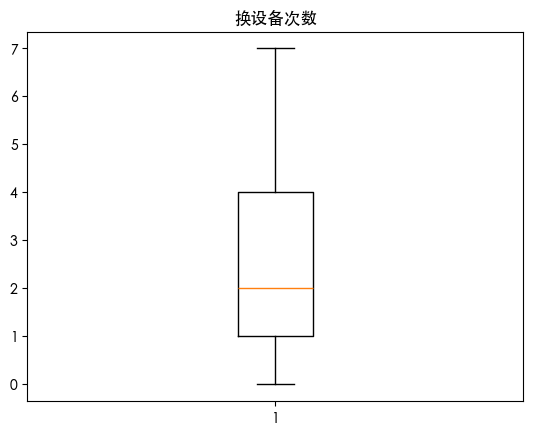

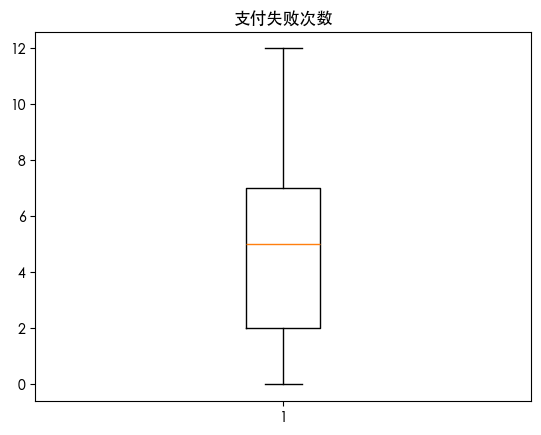

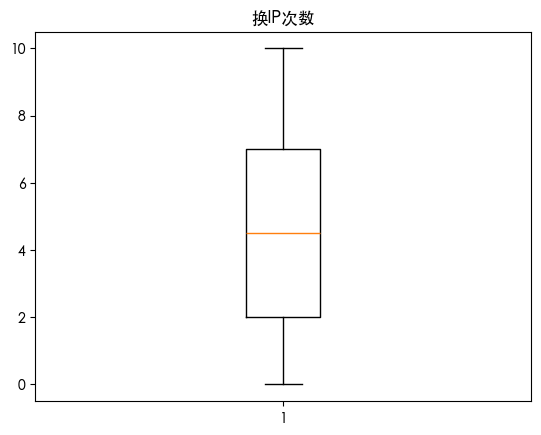

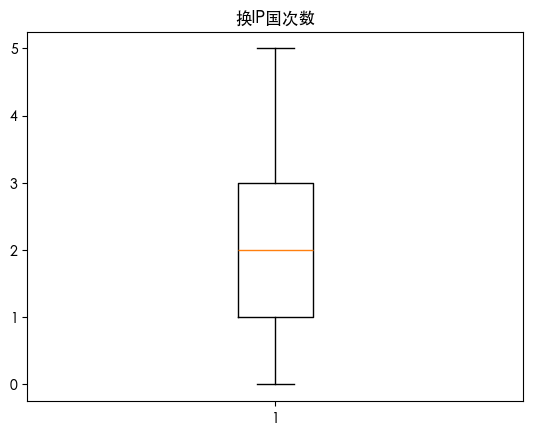

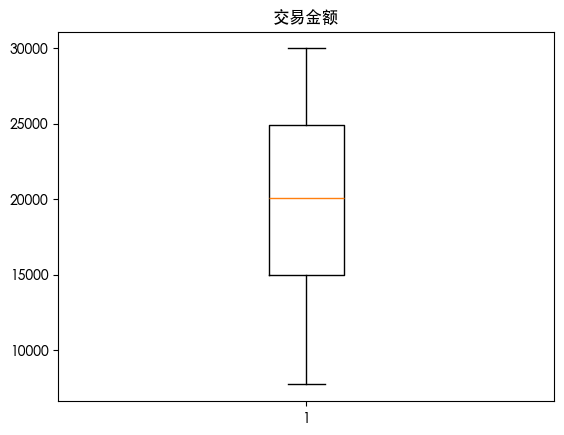

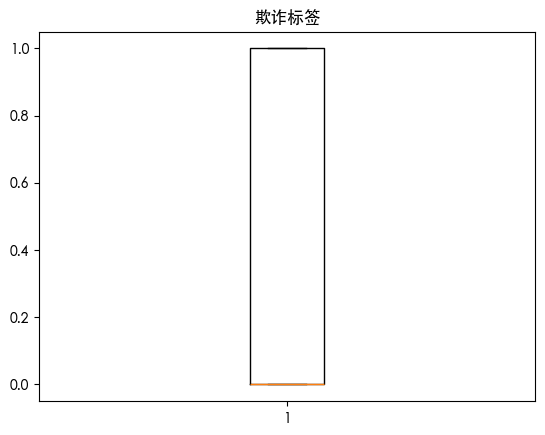

In [6]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['欺诈标签'])
y = df['欺诈标签']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost

[[119   0]
 [ 18  63]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       119
           1       1.00      0.78      0.88        81

    accuracy                           0.91       200
   macro avg       0.93      0.89      0.90       200
weighted avg       0.92      0.91      0.91       200



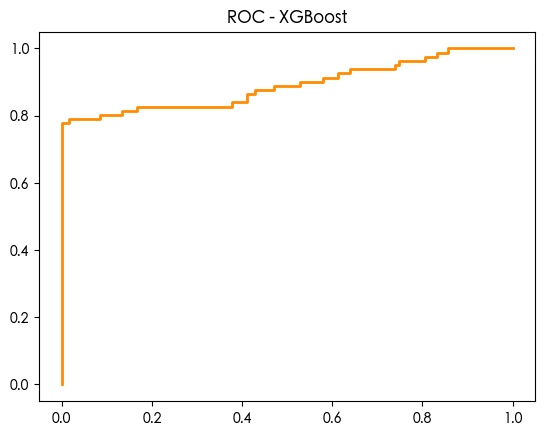

In [11]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.title('ROC - XGBoost')
plt.show()

# LGBM

[LightGBM] [Info] Number of positive: 319, number of negative: 481
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.398750 -> initscore=-0.410676
[LightGBM] [Info] Start training from score -0.410676
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


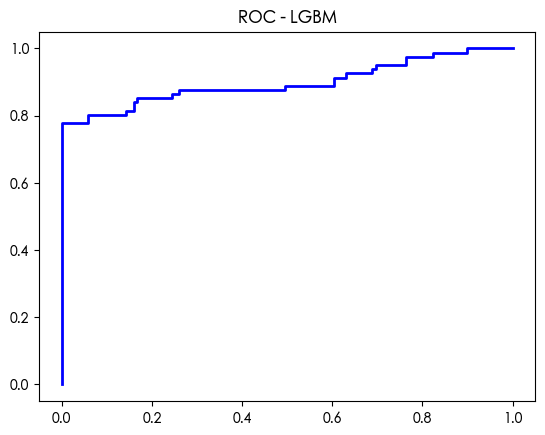

In [12]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary',
    random_state=42
)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_pred_proba_lgbm = lgbm.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_pred_proba_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lgbm)
plt.title('ROC - LGBM')
plt.show()

# 随机森林

[[118   1]
 [ 17  64]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       119
           1       0.98      0.79      0.88        81

    accuracy                           0.91       200
   macro avg       0.93      0.89      0.90       200
weighted avg       0.92      0.91      0.91       200



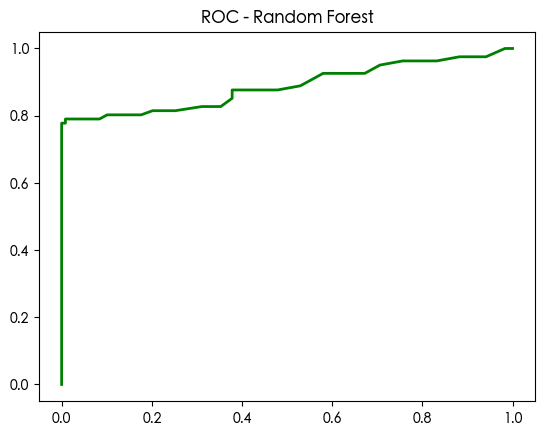

In [15]:
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(n_estimators=100, random_state=42)
rm.fit(X_train, y_train)
y_pred_rm = rm.predict(X_test)
y_pred_proba_rm = rm.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_rm))
print(classification_report(y_test, y_pred_rm))

fpr_rm, tpr_rm, thresholds_rm = roc_curve(y_test, y_pred_proba_rm)
roc_auc_rm = auc(fpr_rm, tpr_rm)
plt.plot(fpr_rm, tpr_rm, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rm)
plt.title('ROC - Random Forest')
plt.show()

# 贝叶斯

[[114   5]
 [ 24  57]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       119
           1       0.92      0.70      0.80        81

    accuracy                           0.85       200
   macro avg       0.87      0.83      0.84       200
weighted avg       0.86      0.85      0.85       200



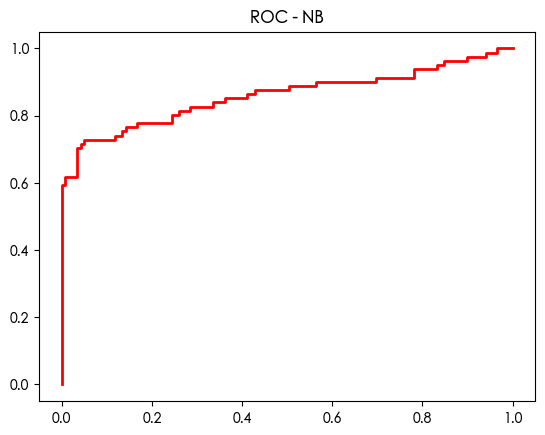

In [17]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_pred_proba_nb = nb.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.title('ROC - NB')
plt.show()

# KNN

[[86 33]
 [57 24]]
              precision    recall  f1-score   support

           0       0.60      0.72      0.66       119
           1       0.42      0.30      0.35        81

    accuracy                           0.55       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.53      0.55      0.53       200



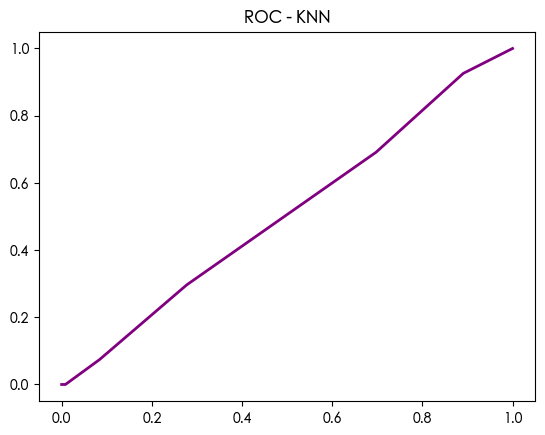

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.title('ROC - KNN')
plt.show()